<a href="https://colab.research.google.com/github/beau378/projet_scoring_resiliation_contrat_auto/blob/main/notebooks/03_Modelisation_Scoring_github_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installation des packages nécessaires à l'étude

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

In [ ]:
!pip install shap

# 2. Import des données


In [ ]:
#Import packages
import pandas as pd

X_train = pd.read_csv(r"X_train.csv", sep=",")
X_test = pd.read_csv(r"X_test_.csv", sep=",")
y_train = pd.read_csv(r"y_train.csv", sep=",")
y_test = pd.read_csv(r"y_test.csv", sep=",")

In [ ]:
X_train.head(5)

,MTPAATTC,DTOBTPDC,DTPMRMCI,RN_VL_VH,S_2_N,S_1_N,S_0_N,S_2_O,S_1_O,S_0_O,...,PUI_TRE_enc,CD_CSP_enc,DTOBTPDC_missing,DTPMRMCI_missing,ANCCLI_missing,RN_VL_VH_missing,RESMH_missing,RESSA_missing,RESIV_missing,RESDI_missing
0,3465.49,10101.0,12753.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,36,0,0,0,0,0,0,0,0
1,957.93,6634.0,2251.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,29,0,0,0,0,0,0,0,0
2,1309.80,6468.0,10227.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4,24,0,0,0,0,0,0,0,0
3,1967.52,11465.0,11566.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,36,0,0,0,0,0,0,0,0
4,1510.56,4808.0,10105.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,19,0,0,0,0,0,0,0,0


In [ ]:
y_train.head(5)

,CONTRAT
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_test.head(5)

,MTPAATTC,DTOBTPDC,DTPMRMCI,RN_VL_VH,S_2_N,S_1_N,S_0_N,S_2_O,S_1_O,S_0_O,...,PUI_TRE_enc,CD_CSP_enc,DTOBTPDC_missing,DTPMRMCI_missing,ANCCLI_missing,RN_VL_VH_missing,RESMH_missing,RESSA_missing,RESIV_missing,RESDI_missing
0,1123.36,-1522.0,8095.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7,17,0,0,0,0,0,0,0,0
1,1721.04,6270.0,11443.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,17,0,0,0,0,0,0,0,0
2,4145.14,5676.0,14365.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,29,0,0,0,0,1,1,1,1
3,1125.98,8167.0,9436.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,19,0,0,0,0,0,0,0,0
4,1331.74,1672.0,4749.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,28,0,0,0,0,0,0,0,0


In [ ]:
y_test.head(5)

,CONTRAT
0,0
1,0
2,0
3,1
4,0


# 3. Modélisation

## 3.1 La régression logistique
Préparation des données : normaliser des variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

var_num = ['DTOBTPDC', 'MTPAATTC', 'DTPMRMCI', 'ANCCLI', 'RN_VL_VH', 'S_2_N', 'S_1_N', 'S_0_N', 'S_2_O', 'S_1_O', 'S_0_O', 'NIVBM', 'MH', 'DI', 'SA', 'IV', 'RESMH', 'RESSA', 'RESIV', 'RESDI', 'COEFPFLT']

var_num_final = [var for var in var_num if var in X_train.columns]

vars_to_add = ['CDMARVEH_enc', 'CDUSGAUT_enc', 'PUI_TRE_enc', 'CD_CSP_enc']

var_num_final += [v for v in vars_to_add if v not in var_num_final and v in X_train.columns]


# Apprentissage pour normaliser sur le jeu d'apprentissage
scaler.fit(X_train[var_num_final])

X_train_norm[var_num_final]= scaler.transform(X_train[var_num_final])
X_test_norm[var_num_final] = scaler.transform(X_test[var_num_final])
X_train_norm.head()

,MTPAATTC,DTOBTPDC,DTPMRMCI,RN_VL_VH,S_2_N,S_1_N,S_0_N,S_2_O,S_1_O,S_0_O,...,PUI_TRE_enc,CD_CSP_enc,DTOBTPDC_missing,DTPMRMCI_missing,ANCCLI_missing,RN_VL_VH_missing,RESMH_missing,RESSA_missing,RESIV_missing,RESDI_missing
0,0.191121,0.759268,0.610649,0.040869,-0.326979,-0.34762,-0.348249,-0.198511,-0.219951,-0.220785,...,-0.769081,0.871037,0,0,0,0,0,0,0,0
1,-1.097527,0.083812,-4.364666,-1.587656,-0.326979,-0.34762,-0.348249,-0.198511,-0.219951,-0.220785,...,0.234240,0.194209,0,0,0,0,0,0,0,0
2,-0.916699,0.051471,-0.586042,0.312289,-0.326979,-0.34762,-0.348249,-0.198511,4.197428,-0.220785,...,-0.434641,-0.289240,0,0,0,0,0,0,0,0
3,-0.578694,1.025009,0.048308,-0.501973,-0.326979,-0.34762,-0.348249,-0.198511,-0.219951,-0.220785,...,0.903120,0.871037,0,0,0,0,0,0,0,0
4,-0.813528,-0.271938,-0.643839,0.312289,-0.326979,-0.34762,-0.348249,-0.198511,-0.219951,-0.220785,...,-0.434641,-0.772689,0,0,0,0,0,0,0,0


### On fait ressortir les variables avec une forte correlation.

In [ ]:
import pandas as pd
import numpy as np

corr_matrix = X_train_norm.corr()

# Masque pour cacher la diagonale et les doublons
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

filtered_corr = corr_matrix.where(mask)

high_positive_corr = filtered_corr[(filtered_corr >= 0.7)].stack().sort_values(ascending=False)
high_negative_corr = filtered_corr[(filtered_corr <= -0.7)].stack().sort_values()

print(" Corrélations POSITIVES ≥ 0.7 :\n")
print(high_positive_corr)

print("\n Corrélations NÉGATIVES ≤ -0.7 :\n")
print(high_negative_corr)

 Corrélations POSITIVES ≥ 0.7 :

RESMH_missing  RESSA_missing    1.0
               RESIV_missing    1.0
               RESDI_missing    1.0
RESSA_missing  RESIV_missing    1.0
               RESDI_missing    1.0
RESIV_missing  RESDI_missing    1.0
dtype: float64

 Corrélations NÉGATIVES ≤ -0.7 :

Series([], dtype: float64)


In [ ]:
#Suppression des variables fortement correlees
corr_matrix = X_train_norm.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.9999)]
X_train_norm.drop(columns=high_corr, inplace=True)

In [ ]:
X_test_norm.drop(columns=high_corr, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convertir tous les booléens en int
X_train_norm = X_train_norm.astype({col: int for col in X_train_norm.columns if X_train_norm[col].dtype == 'bool'})
X_test_norm = X_test_norm.astype({col: int for col in X_test_norm.columns if X_test_norm[col].dtype == 'bool'})

def vif_report(X):
    vif_data = pd.DataFrame()
    vif_data["variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

vif_report(X_train_norm)

,variable,VIF
10,NIVBM,4.569235
40,CDSITFAM_M,3.919199
26,CD_FML_T,3.597919
28,CD_SEX_M,3.585471
0,MTPAATTC,3.307575
3,RN_VL_VH,2.886422
46,NOTAREFF_BL100,2.868027
2,DTPMRMCI,2.162547
44,NOTAREFF_BL064,2.119511
30,REGION_NE,2.096558


In [ ]:
import statsmodels as sm

from statsmodels.api import Logit

X_train_norm["const"] =1
X_test_norm["const"]=1 # pour ajouter l'intercept
lr = Logit(endog=y_train,exog=X_train_norm)

reg = lr.fit()
print(reg.summary())

         Current function value: 0.237562
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                CONTRAT   No. Observations:                53884
Model:                          Logit   Df Residuals:                    53826
Method:                           MLE   Df Model:                           57
Date:                Tue, 29 Jul 2025   Pseudo R-squ.:                  0.1749
Time:                        18:08:14   Log-Likelihood:                -12801.
converged:                      False   LL-Null:                       -15515.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
MTPAATTC             0.3268      0.025     12.830      0.000       0.277       0.377
DTOBTPDC            -0.2183      0.025     -8.719      0.000      -0.267      -0.169
DTPMRMCI            -0.1818 

In [ ]:
#Table variable avec pvalue
table_pvalue= pd.DataFrame(reg.pvalues,columns=["pvalue"])
print(table_pvalue)

                         pvalue
MTPAATTC           1.111729e-37
DTOBTPDC           2.815611e-18
DTPMRMCI           2.262049e-15
RN_VL_VH           1.327607e-06
S_2_N              5.876448e-03
S_1_N              6.596344e-01
S_0_N              7.321684e-01
S_2_O              1.188823e-10
S_1_O              6.312861e-03
S_0_O              1.438781e-07
NIVBM              3.586782e-01
ANCCLI             2.741676e-08
MH                2.234429e-137
DI                 7.135855e-21
SA                 1.392378e-03
IV                 7.041842e-02
RESMH             5.045096e-150
RESSA              6.612548e-03
RESIV              2.626617e-01
RESDI              7.769325e-19
COEFPFLT           1.609417e-17
CD_FML_D           3.713014e-05
CD_FML_E           7.638325e-03
CD_FML_R           7.363383e-07
CD_FML_RARE        2.077924e-01
CD_FML_S           1.008346e-01
CD_FML_T           1.899051e-11
CD_FML_nan         6.181141e-01
CD_SEX_M           4.367113e-02
CD_SEX_nan         3.653337e-02
REGION_N

In [ ]:
#Selection des variables avec une pvalue <=0.05
var_train_reg = table_pvalue[table_pvalue["pvalue"]<0.05].index.values.tolist()
print(var_train_reg)

['MTPAATTC', 'DTOBTPDC', 'DTPMRMCI', 'RN_VL_VH', 'S_2_N', 'S_2_O', 'S_1_O', 'S_0_O', 'ANCCLI', 'MH', 'DI', 'SA', 'RESMH', 'RESSA', 'RESDI', 'COEFPFLT', 'CD_FML_D', 'CD_FML_E', 'CD_FML_R', 'CD_FML_T', 'CD_SEX_M', 'CD_SEX_nan', 'REGION_RARE', 'ECH_CON_fin_an', 'NOTAREFF_B085', 'NOTAREFF_BL064', 'NOTAREFF_BL090', 'NOTAREFF_BL100', 'NOTAREFF_RARE', 'CDMARVEH_enc', 'CDUSGAUT_enc', 'CD_CSP_enc', 'DTPMRMCI_missing', 'const']


In [ ]:
#Selection des variables avec une pvalue >=0.05
var_train_reg = table_pvalue[table_pvalue["pvalue"]>=0.05].index.values.tolist()
print(var_train_reg)

['S_1_N', 'S_0_N', 'NIVBM', 'IV', 'RESIV', 'CD_FML_RARE', 'CD_FML_S', 'CD_FML_nan', 'REGION_NE', 'REGION_OU', 'REGION_PA', 'REGION_RA', 'REGION_SO', 'REGION_nan', 'ECH_CON_nan', 'CDSITFAM_D', 'CDSITFAM_M', 'CDSITFAM_RARE', 'NOTAREFF_B050', 'PUI_TRE_enc', 'DTOBTPDC_missing', 'ANCCLI_missing', 'RN_VL_VH_missing', 'RESMH_missing']


Les coefficients sont dits significatifs à 95% si la pvalue (P>|z|)<0.05. Dans ce cas, nous pouvons voir que des coefficients ne sont pas significatifs, il est pertinent de supprimer ces variables et de ré-apprendre le modèle. Passons aux modeles de regularisation

In [ ]:
from sklearn.linear_model import LogisticRegression
import random
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical

param_dict_bayes_elasticnet = {
    'penalty': Categorical(['elasticnet']),
    'solver': Categorical(['saga']),
    'l1_ratio' : Real(0,0.99, prior='uniform'),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.99, prior='uniform')}

param_dict_bayes_l1 = {
    'penalty': Categorical(['l1']),
    'solver': Categorical(['liblinear','saga']),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.9, prior='uniform')}

param_dict_bayes_l2 = {
    'penalty': Categorical(['l2']),
    'solver': Categorical(['newton-cg', 'lbfgs','sag', 'saga']),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.99, prior='uniform')}


opt = BayesSearchCV(LogisticRegression(),[(param_dict_bayes_elasticnet,10),
                         (param_dict_bayes_l1,10),(param_dict_bayes_l2,10)],
                         cv=5,scoring = 'roc_auc')

from timeit import default_timer as timer

start = timer()
opt.fit(X_train_norm, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LA REGRESSION LOGISTIQUE #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LA REGRESSION LOGISTIQUE #### 
 
 Durée de recherche en seconde :
42.52561040500001

 Paramètres optimaux : 
OrderedDict([('C', 0.4591195676383868), ('fit_intercept', True), ('penalty', 'l1'), ('solver', 'liblinear'), ('tol', 0.17115438191528534)])

 Résultats  : 0.7917994809421383


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

reg_log = LogisticRegression(**opt.best_params_)
reg_log.fit(X_train_norm, y_train)

table_coeff = pd.DataFrame({
    "Variable": X_train_norm.columns,
    "Coefficient": reg_log.coef_[0]
})

print(table_coeff.sort_values(by="Coefficient", key=abs, ascending=False))


print("Intercept :", reg_log.intercept_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


            Variable  Coefficient
56     RESMH_missing    -2.384818
53  DTPMRMCI_missing    -1.113742
37    ECH_CON_fin_an     0.800880
23          CD_FML_R    -0.657142
24       CD_FML_RARE    -0.593071
12                MH    -0.584198
26          CD_FML_T    -0.576275
21          CD_FML_D    -0.512612
42     NOTAREFF_B050    -0.484505
32         REGION_PA    -0.454552
39        CDSITFAM_D    -0.423447
33         REGION_RA    -0.414071
31         REGION_OU    -0.405387
41     CDSITFAM_RARE    -0.387626
27        CD_FML_nan     0.378962
40        CDSITFAM_M    -0.374124
34       REGION_RARE     0.354827
57             const    -0.352587
35         REGION_SO    -0.347943
52  DTOBTPDC_missing    -0.343733
30         REGION_NE    -0.330520
16             RESMH     0.313461
0           MTPAATTC     0.291008
13                DI    -0.264513
1           DTOBTPDC    -0.234671
43     NOTAREFF_B085     0.232398
28          CD_SEX_M    -0.212861
20          COEFPFLT     0.173744
46    NOTAREFF

## 3.1.1 Evaluation du modele de regression de logistique

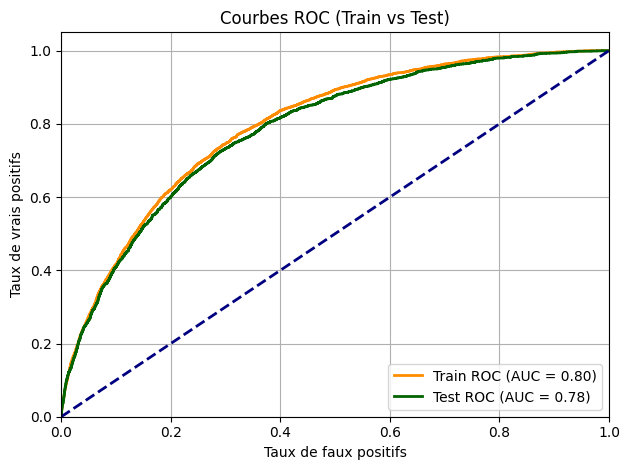

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédiction des probabilités
y_train_proba = reg_log.predict_proba(X_train_norm)[:, 1]
y_test_proba = reg_log.predict_proba(X_test_norm)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Affichage
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkgreen', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC (Train vs Test)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

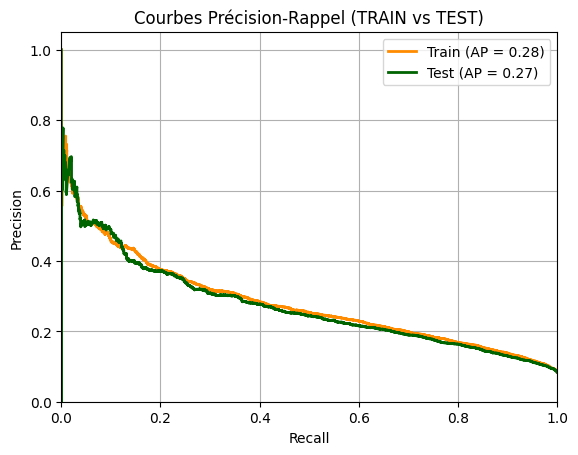

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Précision / Rappel pour TRAIN et TEST
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)

# AUC (Average Precision Score)
ap_train = average_precision_score(y_train, y_train_proba)
ap_test = average_precision_score(y_test, y_test_proba)

# Affichage
plt.figure()
lw = 2
plt.plot(recall_train, precision_train, color='darkorange',
         lw=lw, label=f'Train (AP = {ap_train:.2f})')

plt.plot(recall_test, precision_test, color='darkgreen',
         lw=lw, label=f'Test (AP = {ap_test:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbes Précision-Rappel (TRAIN vs TEST)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Prédictions binaires
y_test_pred = reg_log.predict(X_test_norm)

# Scores
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

# Affichage
print("=== Résultats du modèle optimisé (test) ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Précision : {precision:.4f}")
print(f"Rappel    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

=== Résultats du modèle optimisé (test) ===
Accuracy  : 0.9163
Précision : 0.5093
Rappel    : 0.0424
F1-score  : 0.0782


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Probabilités prédites
y_proba_test = reg_log.predict_proba(X_test_norm)[:, 1]

# Liste des seuils testés
thresholds = np.linspace(0.0, 1.0, 200)

# Stockage des scores
f1_scores = []
precisions = []
recalls = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_test >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh))

# Meilleur seuil selon F1
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]

print(f"Meilleur seuil (F1-score) : {best_thresh:.3f}")
print(f"F1-score : {f1_scores[best_idx]:.4f}")
print(f"Précision : {precisions[best_idx]:.4f}")
print(f"Rappel : {recalls[best_idx]:.4f}")

Meilleur seuil (F1-score) : 0.166
F1-score : 0.3290
Précision : 0.2512
Rappel : 0.4765


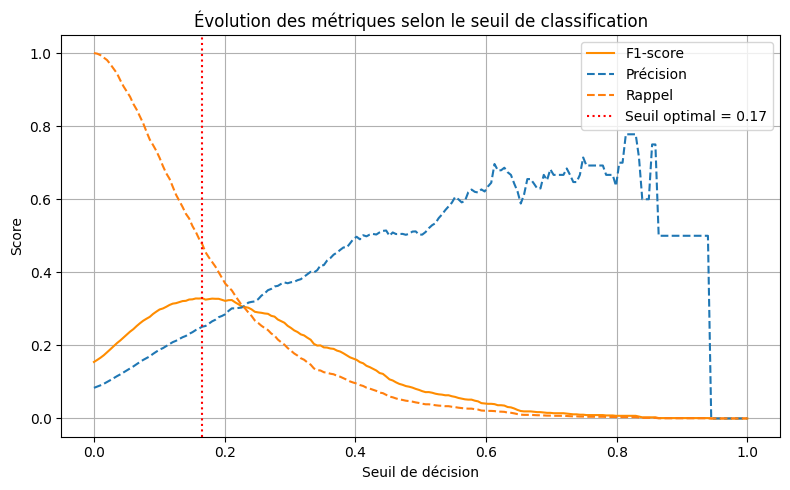

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, label="F1-score", color='darkorange')
plt.plot(thresholds, precisions, label="Précision", linestyle='--')
plt.plot(thresholds, recalls, label="Rappel", linestyle='--')
plt.axvline(x=best_thresh, color='red', linestyle=':', label=f'Seuil optimal = {best_thresh:.2f}')
plt.xlabel("Seuil de décision")
plt.ylabel("Score")
plt.title("Évolution des métriques selon le seuil de classification")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.2 Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Définition de l'algorithme
# Dans notre cas un arbre, où l'utilisateur a fixé les paramètres  criterion, splitter, max_depth
tree = DecisionTreeClassifier(criterion = 'gini', splitter ='best',max_depth=4)

# Apprentissage du modèle
tree.fit(X_train,y_train) # Toujours le même schéma : nom.fit(APP,CIBLE)
print(tree)

DecisionTreeClassifier(max_depth=4)


In [ ]:
# Résultats : prédiction du modèle, si proba >=0.5 prediction = 1 ou 0
y_train_predict = tree.predict(X_train)
print("Vecteur de prédiction :")
print(y_train_predict)


Vecteur de prédiction :
[0 0 0 ... 0 0 0]


In [ ]:
y_test_predict = tree.predict(X_test)

In [ ]:
# Calcul des probabilités prédites
print("\n Probabilités :")
print(tree.predict_proba(X_train))


 Probabilités :
[[0.90305882 0.09694118]
 [0.88720293 0.11279707]
 [0.95536706 0.04463294]
 ...
 [0.88720293 0.11279707]
 [0.95536706 0.04463294]
 [0.98426311 0.01573689]]


In [ ]:
# On conserve en mémoire uniquement la probabilité de l'événement cible

y_train_predict_proba = tree.predict_proba(X_train)[:,1]
print("\n Vecteur de probabilité de l'événement cible")
print(y_train_predict_proba)
y_test_predict_proba = tree.predict_proba(X_test)[:,1]


 Vecteur de probabilité de l'événement cible
[0.09694118 0.11279707 0.04463294 ... 0.11279707 0.04463294 0.01573689]


### 3.2.2 Interpréter un modèle

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(tree, feature_names=X_train.columns, filled = True, max_depth=4, fontsize=50)
plt.show()

L'arbre a l'avantage d'être visuel, et la fonction "feature importance" permet de définir quelles variables ont le plus de pouvoir prédictif

In [ ]:

# Importance des variables
importance_variable = pd.DataFrame()
importance_variable["Variable"]= X_train.columns
importance_variable["Feature Importance"] = tree.feature_importances_
importance_variable.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 5 variables les plus importantes : \n")
importance_variable.head(5)

Les 5 variables les plus importantes : 



,Variable,Feature Importance
12,MH,0.291849
16,RESMH,0.263423
37,ECH_CON_fin_an,0.250779
10,NIVBM,0.083380
11,ANCCLI,0.070277


### 3.2.2 Evaluer un modèle

Pour évaluer la qualité générale d'un modèle : AUC ou logloss

Pour évaluer un modèle avec un objectif précis : matrice de confusion, recall, précision --> Choix du cut off

Plus de détails dans les slides

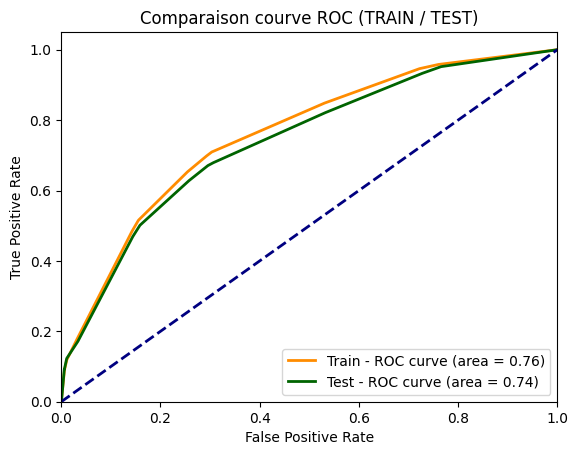

In [ ]:
# Creation des courbes ROC
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predict_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Représentation graphique / courbe ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_test, tpr_test, color='darkgreen',
         lw=lw, label='Test - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC (TRAIN / TEST)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import log_loss
print("log loss app : " + str(log_loss(y_train, y_train_predict_proba)))
print("log loss test : " + str(log_loss(y_test, y_test_predict_proba)))

log loss app : 0.24985237446290914
log loss test : 0.25384947932166235


Peu de différence entre les valeurs obtenues sur les jeux de données test et apprentissage --> le modèle est stable

Si les valeurs diffèrent fortement c'est qu'il y a un problème (sur-apprentissage ??)

In [ ]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
Confusion_matrix_app = confusion_matrix(y_train, y_train_predict)
Confusion_matrix_test= confusion_matrix(y_test, y_test_predict)
print(Confusion_matrix_app)
print(Confusion_matrix_test)

[[49051   318]
 [ 4109   406]]
[[21030   129]
 [ 1756   179]]


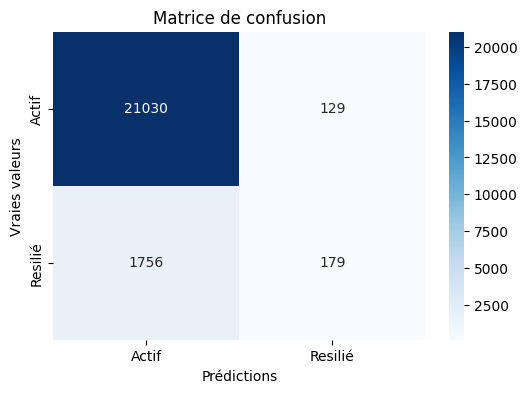

In [ ]:
import seaborn as sns
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_predict)

# Affichage de la matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Actif', 'Resilié'], yticklabels=['Actif', 'Resilié'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Courbes précision / rappel
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_predict_proba)
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_predict_proba)

# Average Precision (AUC PR)
ap_train = average_precision_score(y_train, y_train_predict_proba)
ap_test = average_precision_score(y_test, y_test_predict_proba)

# Tracé
plt.figure()
lw = 2
plt.plot(recall_train, precision_train, color='darkorange', lw=lw, label='Train')
plt.plot(recall_test, precision_test, color='darkgreen', lw=lw, label='Test')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL (TRAIN / TEST)')
plt.legend(loc="upper right")

# Affichage des scores AUC PR
plt.text(0.5, 0.2, f"AP (Train) = {ap_train:.4f}", color='darkorange', fontsize=10)
plt.text(0.5, 0.1, f"AP (Test) = {ap_test:.4f}", color='darkgreen', fontsize=10)

plt.show()

Choix du seuil :  Dépend de notre problématique qui est d'optimiser la précision et non le recall.
- Exemple 1 : nous souhaitons avoir mois de 2% d'erreur dans notre ciblage et un recall maximum quel seuil choisir ?

In [ ]:
## Choix du seuil - Tableau seuil /
table_choix_seuil = pd.DataFrame()
table_choix_seuil["SEUIL"] = [0] + list(thresholds_train)
table_choix_seuil["Precision_train"] = precision_train
table_choix_seuil["Recall_train"] = recall_train
table_choix_seuil.sort_values(by = "SEUIL", axis=0, ascending=False, inplace=True)
print(table_choix_seuil)

In [ ]:
# Application du seuil selectionne au jeu d'apprentissage
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

seuil = 0.5
y_train_predict_seuil = (y_train_predict_proba>seuil)*1

print("Metrique pour le jeu de données train : ")
print("\n Recall : " + str(recall_score(y_train, y_train_predict_seuil)))

print("\n Précision : " + str(precision_score(y_train, y_train_predict_seuil)))
Confusion_matrix_app = confusion_matrix(y_train, y_train_predict_seuil)
print(pd.DataFrame(Confusion_matrix_app))

In [ ]:
# Application au jeu de test

print("Metrique pour le jeu de données test : ")
y_test_predict_seuil = (y_test_predict_proba>=seuil)*1

print("\n Recall : " + str(recall_score(y_test, y_test_predict_seuil)))
print("\n Précision : " + str(precision_score(y_test, y_test_predict_seuil)))

Confusion_matrix_test= confusion_matrix(y_test, y_test_predict_seuil)
print(pd.DataFrame(Confusion_matrix_test))

### 3.2.3 Optimisation du modèle : choix des paramètres

Pour optimiser les résultats, le choix des paramètres est très important. Plusieurs approches :

    - Méthode aléatoire
    - Méthode grid Search
    - Méthode Optimisation Bayesienne
  
Plus d'informations dans les slides

In [ ]:
import random
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical
# Création du dictionnaire des indicateurs que nous souhaitons testés pour la méthode Random ou GridSearch
param_dict = {
    'criterion': ['gini', 'entropy'], # Le critère de split des arbres
    'splitter': ['best','random'],    # Est-ce que l'on teste un échantillon de variable (random)
                                        #ou toutes les variables (best) à chaque neoud
    'max_depth': [3,4,10],  # Profondeur maximum de l'arbre
    'min_samples_split': [2,4], # # Nombre d'observations mimnimum pour créer un split
    'min_samples_leaf': [1,5,10],     # Nombre d'observations minimum dans une feuille
    'min_weight_fraction_leaf': [0,0.01], # Proportion minimum des observations dans une feuille
    'max_features': ['log2',"sqrt"]}

#Création  du dictionnaire de recherche pour la méthode d'optimisation bayesienne


clf = DecisionTreeClassifier()
# Définition des paramètres avec des lois de probabilités
param_dict_bayes = {
    'criterion': Categorical(['gini', 'entropy']),
    'splitter': Categorical(['best','random']),
    'max_depth': Integer(3,30),
    'min_samples_split': Integer(2,50),
    'min_samples_leaf': Integer(1,20),
    'min_weight_fraction_leaf': Real(0,0.5, prior='uniform')}

# Grilles des paramètres

NB_ITER = 5 # Nombre d'itéations maximum pour le Random et l'optimisation Bayesienne

#Tirage aléatoire d'une combinaison de paramètre

from sklearn.model_selection import cross_validate
# Définition d'une fonction
def random_parameter(clf,param_dict,n_iter,X_train,y_train,nb_cv) :
    res = pd.DataFrame()
    compt = 0
    num_iter = []
    auc=[]
    param = []
    while compt <n_iter :
        compt = compt +1
        params = {key: random.sample(value, 1)[0] for key, value in param_dict.items()}
        clf.set_params(**params)
        scores = cross_validate(clf, X_train, y_train, cv=5,
                        scoring = ['roc_auc'])
        num_iter.append(compt)
        param.append(params)
        auc.append(scores['test_roc_auc'].mean())

    res["Num_ITER"] = num_iter
    res["Param"] = param
    res["Auc"] = auc

    return res



from timeit import default_timer as timer
start = timer()
Random_Res_Tree = random_parameter(DecisionTreeClassifier() ,param_dict,NB_ITER,X_train,y_train,5)
delais = timer()- start
print(" #### RECHERCHE ALEATOIRE #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
Random_Res_Tree.sort_values('Auc', ascending = False, inplace = True)
Random_Res_Tree.head()
# Récupère les paramètres qui nous intéresse :
best_param_random_search = list(Random_Res_Tree["Param"])[0]
print("\n Paramètres recherche aléatoire : ")
print(best_param_random_search)

print("\n Résultats recherche aléatoire : " + str(Random_Res_Tree['Auc'].max()))


####  choix des paramètres : utilisation du  Grid Search


from sklearn.model_selection import GridSearchCV

start = timer()
Grid_Search = GridSearchCV(DecisionTreeClassifier(),param_dict,scoring='roc_auc',cv=5)
Grid_Search.fit(X_train,y_train)
delais = timer()- start
print(" #### RECHERCHE GRID SEARCH #### ")
print(" \n Durée de recherche en minute :")
print(delais/60)
print("\n Paramètres grid search : ")
best_param_gid_search = Grid_Search.best_params_
print(best_param_gid_search)
best_score_grid_search = Grid_Search.best_score_
print("\n Résultats grid search  : " + str(best_score_grid_search))



opt = BayesSearchCV(clf,param_dict_bayes , n_iter=NB_ITER,cv=5,scoring = 'roc_auc')
start = timer()
opt.fit(X_train, y_train)
delais = timer()- start

print(" #### RECHERCHE OPTIMISATION #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres grid search : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats grid search  : " + str(best_score_opti_bayes))

### 3.2.4 Comparaison des différents arbres de décision

In [ ]:
# Comparaison des 3 modèles
import matplotlib.pyplot as plt
tree_random = DecisionTreeClassifier(**best_param_random_search)
tree_grid_search = DecisionTreeClassifier(**Grid_Search.best_params_)
tree_opti =  DecisionTreeClassifier(**opt.best_params_)

tree_random.fit(X_train,y_train)
fpr_train_random, tpr_train_random, thresholds_train_random = roc_curve(y_train, tree_random.predict_proba(X_train)[:,1])
roc_auc_train_random = auc(fpr_train_random, tpr_train_random)

tree_grid_search.fit(X_train,y_train)
fpr_train_grid_search, tpr_train_grid_search, thresholds_train_grid_search = roc_curve(y_train, tree_grid_search.predict_proba(X_train)[:,1])
roc_auc_train_grid_search = auc(fpr_train_grid_search, tpr_train_grid_search)

tree_opti.fit(X_train,y_train)
fpr_train_opti, tpr_train_opti, thresholds_train_opti = roc_curve(y_train, tree_opti.predict_proba(X_train)[:,1])
roc_auc_train_opti = auc(fpr_train_opti, tpr_train_opti)



plt.figure()
lw = 2
plt.plot(fpr_train_random, tpr_train_random, color='darkorange',
         lw=lw, label='Train -Arbre (Random) - ROC curve (area = %0.2f)' % roc_auc_train_random)

plt.plot(fpr_train_grid_search, tpr_train_grid_search, color='darkblue',
         lw=lw, label='Train -Arbre (Grid search) - ROC curve (area = %0.2f)' % roc_auc_train_grid_search)

plt.plot(fpr_train_opti, tpr_train_opti, color='darkgreen',
         lw=lw, label='Train -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_train_opti)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()


fpr_test_random, tpr_test_random, _ = roc_curve(y_test, tree_random.predict_proba(X_test)[:,1])
roc_auc_test_random = auc(fpr_test_random, tpr_test_random)

fpr_test_grid_search, tpr_test_grid_search, _ = roc_curve(y_test, tree_grid_search.predict_proba(X_test)[:,1])
roc_auc_test_grid_search = auc(fpr_test_grid_search, tpr_test_grid_search)

fpr_test_opti, tpr_test_opti, _ = roc_curve(y_test, tree_opti.predict_proba(X_test)[:,1])
roc_auc_test_opti = auc(fpr_test_opti, tpr_test_opti)


plt.figure()
lw = 2
plt.plot(fpr_test_random, tpr_test_random, color='darkorange',
         lw=lw, label='test -Arbre (Random) - ROC curve (area = %0.2f)' % roc_auc_test_random)

plt.plot(fpr_test_grid_search, tpr_test_grid_search, color='darkblue',
         lw=lw, label='test -Arbre (Grid search) - ROC curve (area = %0.2f)' % roc_auc_test_grid_search)

plt.plot(fpr_test_opti, tpr_test_opti, color='darkgreen',
         lw=lw, label='test -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_test_opti)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC - TEST ')
plt.legend(loc="lower right")
plt.show()

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict_proba)
roc_auc_test = auc(fpr_test, tpr_test)

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# -------- TRAIN --------
precision_train_random, recall_train_random, _ = precision_recall_curve(y_train, tree_random.predict_proba(X_train)[:,1])
auc_pr_train_random = auc(recall_train_random, precision_train_random)

precision_train_grid, recall_train_grid, _ = precision_recall_curve(y_train, tree_grid_search.predict_proba(X_train)[:,1])
auc_pr_train_grid = auc(recall_train_grid, precision_train_grid)

precision_train_opti, recall_train_opti, _ = precision_recall_curve(y_train, tree_opti.predict_proba(X_train)[:,1])
auc_pr_train_opti = auc(recall_train_opti, precision_train_opti)

plt.figure()
plt.plot(recall_train_random, precision_train_random, label=f"Train - Arbre Random (AUC = {auc_pr_train_random:.2f})", color='darkorange')
plt.plot(recall_train_grid, precision_train_grid, label=f"Train - Arbre GridSearch (AUC = {auc_pr_train_grid:.2f})", color='darkblue')
plt.plot(recall_train_opti, precision_train_opti, label=f"Train - Arbre Opti (AUC = {auc_pr_train_opti:.2f})", color='darkgreen')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Comparaison courbe Précision / Rappel - TRAIN")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------- TEST --------
precision_test_random, recall_test_random, _ = precision_recall_curve(y_test, tree_random.predict_proba(X_test)[:,1])
auc_pr_test_random = auc(recall_test_random, precision_test_random)

precision_test_grid, recall_test_grid, _ = precision_recall_curve(y_test, tree_grid_search.predict_proba(X_test)[:,1])
auc_pr_test_grid = auc(recall_test_grid, precision_test_grid)

precision_test_opti, recall_test_opti, _ = precision_recall_curve(y_test, tree_opti.predict_proba(X_test)[:,1])
auc_pr_test_opti = auc(recall_test_opti, precision_test_opti)

plt.figure()
plt.plot(recall_test_random, precision_test_random, label=f"Test - Arbre Random (AUC = {auc_pr_test_random:.2f})", color='darkorange')
plt.plot(recall_test_grid, precision_test_grid, label=f"Test - Arbre GridSearch (AUC = {auc_pr_test_grid:.2f})", color='darkblue')
plt.plot(recall_test_opti, precision_test_opti, label=f"Test - Arbre Opti (AUC = {auc_pr_test_opti:.2f})", color='darkgreen')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Comparaison courbe Précision / Rappel - TEST")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.3 BAGGING  : RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


### 3.3.1 Comparaison des modèles

In [ ]:
# Apprentissage du modèle

rf_clf = RandomForestClassifier(**opt.best_params_)

rf_clf.fit(X_train,y_train)
#Calcul des métriques


fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(y_train, rf_clf.predict_proba(X_train)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)



plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train -Reg log - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_train_opti, tpr_train_opti, color='darkgreen',
         lw=lw, label='Train -Abre (Opti) - ROC curve (area = %0.2f)' % roc_auc_train_opti)

plt.plot(fpr_train_RF, tpr_train_RF, color='darkblue',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()


fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)



plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='test -Reg log - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot(fpr_test_opti, tpr_test_opti, color='darkgreen',
         lw=lw, label='test -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_test_opti)

plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC - TEST ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL


precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(y_train,
                                                                         rf_clf.predict_proba(X_train)[:,1])
plt.figure()
lw = 2
plt.plot(recall_train,precision_train, color='darkorange',
         lw=lw,  label='Train -Reg log')

plt.plot(recall_train_opti,precision_train_opti, color='darkgreen',
         lw=lw, label='Train - Arbre (Opti)')


plt.plot(recall_train_RF,precision_train_RF, color='darkblue',
         lw=lw, label='Train - RF')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()


# Vérification sur le test

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(y_test,
                                                                         rf_clf.predict_proba(X_test)[:,1])

plt.figure()
lw = 2
plt.plot(recall_test,precision_test, color='darkorange',
         lw=lw,  label='Test -Reg log')

plt.plot(recall_test_opti,precision_test_opti, color='darkgreen',
         lw=lw, label='Test - Arbre (Opti)')

plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

### 3.3.2 Interpréation : utilisation des variables d'importances

In [ ]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_train.columns
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 5 variables les plus importantes : \n")
importance_variable_rf.head(5)



## 3.3 BOOSTING : XGBOOST

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import xgboost as xgb
from timeit import default_timer as timer

# Dictionnaire des hyperparamètres pour XGBoost
param_dict_XGB = {
    'objective': Categorical(['binary:logistic']),         # Classification binaire
    'booster': Categorical(['gbtree']),                    # Type de booster (arbre)
    'learning_rate': Real(0.05, 1.0, prior='uniform'),     # Taux d’apprentissage
    'max_depth': Integer(3, 10),                           # Profondeur max des arbres
    'n_estimators': Integer(50, 200)                       # Nombre total d’arbres
}

# Recherche bayésienne
opt = BayesSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    search_spaces=param_dict_XGB,
    n_iter=NB_ITER,
    cv=5,
    scoring='roc_auc',
    verbose=0
)

# Apprentissage
start = timer()
opt.fit(X_train, y_train)
delais = timer() - start

# Résultats
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)

best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_

print("\n Paramètres optimaux : ")
print(best_param_opti_bayes)

print("\n Résultats  : " + str(best_score_opti_bayes))

# Réentraînement final avec les meilleurs paramètres
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_param_opti_bayes)
xgb_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# === PREDICTIONS PROBA ===
y_train_proba_xgb = xgb_clf.predict_proba(X_train)[:, 1]
y_test_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# === COURBE ROC ===
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train, y_train_proba_xgb)
roc_auc_train_xgb = auc(fpr_train_xgb, tpr_train_xgb)

fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

# === AFFICHAGE ROC ===
plt.figure()
plt.plot(fpr_train_xgb, tpr_train_xgb, color='blue', lw=2, label=f'Train - AUC = {roc_auc_train_xgb:.2f}')
plt.plot(fpr_test_xgb, tpr_test_xgb, color='green', lw=2, label=f'Test - AUC = {roc_auc_test_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# === COURBE PR ===
precision_train_xgb, recall_train_xgb, _ = precision_recall_curve(y_train, y_train_proba_xgb)
precision_test_xgb, recall_test_xgb, _ = precision_recall_curve(y_test, y_test_proba_xgb)

# === AFFICHAGE PRÉCISION-RAPPEL ===
plt.figure()
plt.plot(recall_train_xgb, precision_train_xgb, color='blue', lw=2, label='Train')
plt.plot(recall_test_xgb, precision_test_xgb, color='green', lw=2, label='Test')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe Précision-Rappel - XGBoost')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [ ]:
#XGBOOST
import xgboost as xgb


param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gbtree']), #,'gblinear','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform')
    }

opt = BayesSearchCV(xgb.XGBClassifier(),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_train,y_train)

## 3.4 COMPARAISON DE TOUS LES MODELES

In [ ]:

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(y_train, xgb_clf.predict_proba(X_train)[:,1])
roc_auc_train_XGB = auc(fpr_train_XGB, tpr_train_XGB)





plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='Train -Reg log - ROC curve (area = %0.2f)' % roc_auc_train)

plt.plot(fpr_train_opti, tpr_train_opti, color='darkgreen',
         lw=lw, label='Train -Abre (Opti) - ROC curve (area = %0.2f)' % roc_auc_train_opti)

plt.plot(fpr_train_RF, tpr_train_RF, color='darkblue',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)


plt.plot(fpr_train_XGB, tpr_train_XGB, color='r',
         lw=lw, label='Train -XGB - ROC curve (area = %0.2f)' % roc_auc_train_XGB)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)


plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='test -Reg log - ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot(fpr_test_opti, tpr_test_opti, color='darkgreen',
         lw=lw, label='test -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_test_opti)

plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot(fpr_test_XGB, tpr_test_XGB, color='r',
         lw=lw, label='Test - XGB - ROC curve (area = %0.2f)' % roc_auc_test_XGB)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC - TEST ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL


precision_train_XGB, recall_train_XGB, thresholds_train_XGB = precision_recall_curve(y_train,
                                                                         xgb_clf.predict_proba(X_train)[:,1])


plt.figure()
lw = 2
plt.plot(recall_train,precision_train, color='darkorange',
         lw=lw,  label='Train -Reg log')

plt.plot(recall_train_opti,precision_train_opti, color='darkgreen',
         lw=lw, label='Train - Arbre (Opti)')


plt.plot(recall_train_RF,precision_train_RF, color='darkblue',
         lw=lw, label='Train - RF')

plt.plot(recall_train_XGB,precision_train_XGB, color='r',
         lw=lw, label='Train - XGB')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()


# Vérification sur le test

precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(y_test,
                                                                         xgb_clf.predict_proba(X_test)[:,1])

plt.figure()
lw = 2
plt.plot(recall_test,precision_test, color='darkorange',
         lw=lw,  label='Test -Reg log')

plt.plot(recall_test_opti,precision_test_opti, color='darkgreen',
         lw=lw, label='Test - Arbre (Opti)')

plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')

plt.plot(recall_test_XGB,precision_test_XGB, color='r',
         lw=lw, label='Test - XGB')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

# ======= TRAIN ========
precision_train_XGB, recall_train_XGB, _ = precision_recall_curve(y_train, xgb_clf.predict_proba(X_train)[:,1])
ap_train_XGB = average_precision_score(y_train, xgb_clf.predict_proba(X_train)[:,1])
auc_pr_train_XGB = auc(recall_train_XGB, precision_train_XGB)

plt.figure()
lw = 2
#plt.plot(recall_train, precision_train, color='darkorange',
         #lw=lw,  label=f'Train -Reg log (AP = {average_precision_score(y_train, reg_log.predict_proba(X_train)[:,1]):.2f})')

plt.plot(recall_train_opti, precision_train_opti, color='darkgreen',
         lw=lw, label=f'Train - Arbre Opti (AP = {auc(recall_train_opti, precision_train_opti):.2f})')

plt.plot(recall_train_RF, precision_train_RF, color='darkblue',
         lw=lw, label=f'Train - RF (AP = {average_precision_score(y_train, rf_clf.predict_proba(X_train)[:,1]):.2f})')


plt.plot(recall_train_XGB, precision_train_XGB, color='r',
         lw=lw, label=f'Train - XGB (AP = {ap_train_XGB:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe Précision / Rappel - TRAIN')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()


# ======== TEST =========

precision_test_XGB, recall_test_XGB, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
ap_test_XGB = average_precision_score(y_test, xgb_clf.predict_proba(X_test)[:,1])


plt.figure()
lw = 2
#plt.plot(recall_test, precision_test, color='darkorange',
         #lw=lw,  label=f'Test -Reg log (AP = {average_precision_score(y_test, reg_log.predict_proba(X_test)[:,1]):.2f})')

plt.plot(recall_test_opti, precision_test_opti, color='darkgreen',
         lw=lw, label=f'Test - Arbre Opti (AP = {auc(recall_test_opti, precision_test_opti):.2f})')

plt.plot(recall_test_RF, precision_test_RF, color='darkblue',
         lw=lw, label=f'Test - RF (AP = {average_precision_score(y_test, rf_clf.predict_proba(X_test)[:,1]):.2f})')


plt.plot(recall_test_XGB, precision_test_XGB, color='r',
         lw=lw, label=f'Test - XGB (AP = {ap_test_XGB:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe Précision / Rappel - TEST')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install scikit-plot

# 3.5 Courbe lift

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

def plot_lift_curve(y_true, y_proba, pos_label=1):
    # Trier les probabilités et les vraies classes
    order = np.argsort(y_proba)[::-1]
    y_true_sorted = np.array(y_true)[order]

    # Nombre de positifs totaux
    total_positives = sum(y_true_sorted == pos_label)

    # Cumul des vrais positifs en fonction du nombre d'observations
    cum_true_positives = np.cumsum(y_true_sorted == pos_label)

    # Pourcentage d'observations
    percentages = np.arange(1, len(y_true_sorted)+1) / len(y_true_sorted)

    # Lift = % de positifs captés / % de positifs attendus
    lift = cum_true_positives / (total_positives * percentages)

    plt.figure(figsize=(8,6))
    plt.plot(percentages, lift, label='Lift curve')
    plt.axhline(y=1, color='r', linestyle='--', label='Random')
    plt.xlabel('% de la population ciblée')
    plt.ylabel('Lift')
    plt.title('Lift Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

y_predict_proba = rf_clf.predict_proba(X_test)[:,1]
plot_lift_curve(y_test, y_predict_proba)

## 3.6 Interprétation des modèles "boites noires"

### Package shap

In [ ]:
import shap
#  XGboost

explainerSKGBT = shap.TreeExplainer(xgb_clf)

shap_values_SKGBT_test = explainerSKGBT.shap_values(X_test)

shap_values_SKGBT_train = explainerSKGBT.shap_values(X_train)

## EXPLICATION DU MODELE
shap.summary_plot(explainerSKGBT.shap_values(X_train),X_train)

## 3.7 Analyse comparative de tous les modeles implementes

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
import pandas as pd

# Dictionnaire des modèles à évaluer (adapte les noms aux tiens si besoin)
models = {
    'Logistic Regression': reg_log,
    'Decision Tree': tree_opti,
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
}

# Données d'entrée spécifiques à chaque modèle (normalisé ou non)
X_test_input = {
    'Logistic Regression': X_test_norm,
    'Decision Tree': X_test,
    'Random Forest': X_test,
    'XGBoost': X_test,
}

# Calcul des scores
results = []

for name, model in models.items():
    X_input = X_test_input[name]

    # Prédictions binaires et probabilités
    y_pred = model.predict(X_input)
    y_proba = model.predict_proba(X_input)[:, 1]

    # Scores
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc_score = roc_auc_score(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)

    results.append({
        'Modèle': name,
        'F1-score': round(f1, 4),
        'Précision': round(precision, 4),
        'Rappel': round(recall, 4),
        'AUC ROC': round(auc_score, 4),
        'Average Precision': round(ap_score, 4)
    })

# Affichage tabulaire trié par F1-score décroissant
score_df = pd.DataFrame(results).sort_values(by='F1-score', ascending=False).reset_index(drop=True)
display(score_df)

## 3.8 Profil a risque

### Definition de seuil

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score


# Courbe précision–rappel
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
thresholds = np.append(thresholds, 1.0)  # Pour aligner avec la taille de precisions/recalls

# F1-score pour chaque seuil
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Seuil optimal selon F1-score
idx_best = np.argmax(f1s)
best_threshold = thresholds[idx_best]
best_f1 = f1s[idx_best]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Précision', color='tab:blue')
plt.plot(thresholds, recalls, label='Rappel', color='tab:green')
plt.plot(thresholds, f1s, label='F1-score', color='tab:orange', linestyle='--')
plt.axvline(best_threshold, color='tab:red', linestyle=':', label=f'Seuil optimal (F1={best_f1:.2f})')

plt.xlabel('Seuil de décision')
plt.ylabel('Score')
plt.title('Évolution de la précision, du rappel et du F1-score en fonction du seuil')
plt.legend()
plt.grid(True)
plt.show()

print(f" Meilleur seuil (selon F1-score) : {best_threshold:.4f}")

## 3.9 Prediction avec le seuil optimal et segmentation des clients a risque

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prédire les probabilités avec ton modèle
y_test_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Correction complète et robuste
proba_resiliation = y_test_proba[:, 1] if y_test_proba.ndim > 1 else y_test_proba

if isinstance(y_test, pd.DataFrame):
    y_true = y_test.iloc[:, 0]
elif hasattr(y_test, 'ndim') and y_test.ndim == 2:
    y_true = y_test.ravel()
else:
    y_true = y_test

df = pd.DataFrame({
    'proba_resiliation': proba_resiliation,
    'y_true': y_true
})


# 3. Ajouter la variable "risque" selon ton seuil F1
seuil_f1 = 0.5599
df['risque'] = (df['proba_resiliation'] >= seuil_f1).astype(int)

# 4. Affichage des taux de résiliation réels par segment
grouped = df.groupby('risque')['y_true'].mean().reset_index()
grouped['risque'] = grouped['risque'].map({0: 'Faible', 1: 'Élevé'})

# 5. Barplot clair
plt.figure(figsize=(6, 4))
sns.barplot(x='risque', y='y_true', data=grouped, palette='viridis')
plt.ylabel('Taux de résiliation réel')
plt.xlabel('Segment basé sur le seuil optimal F1')
plt.title('Validation de la segmentation binaire du modèle')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
X_test = pd.read_csv(r"X_test (1).csv", sep=",")
X_test.head(5)

In [ ]:
# 1. Récupérer les probabilités de résiliation (déjà calculées)
# Ici on suppose que y_test_proba est un tableau numpy (proba classe 1)

# 2. Ajouter au X_test original une colonne "proba"
X_test['proba_resiliation'] = proba_resiliation

# 3. Filtrer les clients à risque (selon seuil de 0.1961)
seuil = 0.1961
X_test_risque = X_test[X_test['proba_resiliation'] >= seuil].copy()

# Trier par risque décroissant
X_test_risque = X_test_risque.sort_values(by='proba_resiliation', ascending=False)

In [ ]:
X_test.to_csv("X_y_test.csv", index=False)

In [ ]:
y_test_risque = y_test[y_test_proba >= seuil].copy()

In [ ]:
(X_test_risque.index == y_test_risque.index).all()  # doit retourner True

In [ ]:
import pandas as pd

# Définir le seuil
seuil = 0.1876 #0.1961  # déjà calculé

# Filtrer les clients à risque
X_test_risque = X_test[y_test_proba >= seuil].copy()
y_test_risque = y_test[y_test_proba >= seuil].copy()
proba_risque = y_test_proba[y_test_proba >= seuil]

# Construire le DataFrame final
df_risque = X_test_risque.copy()
df_risque['y_true'] = y_test_risque.values
df_risque['proba_resiliation'] = proba_risque

# trier par probabilité décroissante
df_risque = df_risque.sort_values(by='proba_resiliation', ascending=False).reset_index(drop=True)

In [ ]:
import pandas as pd

# Liste des variables importantes (dans df_risque)
variables_importantes = [
    'MH', 'ECH_CON', 'MTPAATTC', 'DTPMRMCI', 'DTOBTPDC',
    'ANCCLI', 'COEFPFLT', 'RESMH', 'NIVBM', 'DI',
    'CD_FML', 'CDUSGAUT', 'RN_VL_VH', 'CD_CSP', 'CDMARVEH',
    'NOTAREFF', 'RESDI', 'SA'
]

def profiler_variable(var):
    serie = df_risque[var]

    if pd.api.types.is_numeric_dtype(serie):
        # Quantitative : top 5 valeurs les plus fréquentes -> intervalle
        top_vals = serie.value_counts().head(5).index
        return f"[{min(top_vals)} ; {max(top_vals)}]"

    elif serie.nunique() == 2:
        # Variable binaire : classe modale
        top = serie.value_counts().idxmax()
        return str(top)

    else:
        # Variable catégorielle : top 3 modalités
        top_modalites = serie.value_counts().head(3).index.tolist()
        return ', '.join(map(str, top_modalites))

# Création du tableau
profil_risque = pd.DataFrame({
    'Variable': variables_importantes,
    'Profil à risque': [profiler_variable(v) for v in variables_importantes]
})

# Affichage
from IPython.display import display
display(profil_risque)

# 4. IMPORTATION

In [ ]:
df_risque.to_csv("df_risque.csv", index=False)
profil_risque.to_csv("profil_risque.csv", index=False)


In [ ]:
import pandas as pd

# Copie de X_test
X_test_enriched = X_test.copy()

# Ajouter la colonne de probas
X_test_enriched["proba_resiliation"] = y_test_proba

# Ajouter la colonne y_test (en extrayant la bonne série depuis le DataFrame)
X_test_enriched["y_true"] = y_test.iloc[:, 0].reset_index(drop=True)

# Si les index ne sont pas alignés, on les réinitialise
X_test_enriched.reset_index(drop=True, inplace=True)

In [ ]:
X_test_enriched.to_csv("X_test_enriched.csv", index=False)

In [ ]:
print(len(X_test), len(y_test))

In [ ]:
print((X_test.index == y_test.index).all())